<a href="https://colab.research.google.com/github/ipek-yilmaz/ANN-Churn_Modelling/blob/main/ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.head()

In [ ]:
X = dataset.iloc[:,3:-1]
y = dataset.iloc[:,-1]

In [ ]:
X

In [ ]:
y

In [ ]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [ ]:
geography

In [ ]:
gender

In [ ]:
X

In [ ]:
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
X

In [ ]:
X = X.drop(["Geography","Gender"],axis=1)

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
#If you deal with DL you must alyways do feature scaling
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train

In [ ]:
#Perform hyperparameter optimization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu,sigmoid

In [ ]:
def create_models(layers,activation):
  model = Sequential()
  for i, nodes in enumarate(layers):
    if i==0:
      model.add(Dense(nodes,units=X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))

    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))

  model.add(Dense(units=1, kernel_initializer="glorot_uniform",activation="sigmoid"))
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
layers = [[20], [20,40], [10,15,20]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128,256], epochs=[30,50])
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [ ]:
grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

In [1]:
#@title
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ReLU,PReLU
from keras.layers import Dropout

In [2]:
#@title
#Initialing the ANN
classifier = Sequential()

In [3]:
#@title
#Adding the input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu",input_dim=11))

In [ ]:
#@title
#Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))

In [ ]:
#@title
#Adding output layer
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform",activation="sigmoid"))

In [ ]:
#@title
#Compiling the ANN
classifier.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
#@title
#Fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=20, epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.7851 - accuracy: 0.3725 - val_loss: 0.5923 - val_accuracy: 0.7702
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7995 - val_loss: 0.5120 - val_accuracy: 0.7893
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7877 - val_loss: 0.4915 - val_accuracy: 0.7893
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7932 - val_loss: 0.4823 - val_accuracy: 0.7893
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7944 - val_loss: 0.4762 - val_accuracy: 0.7893
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7997 - val_loss: 0.4707 - val_accuracy: 0.7893
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7968 - val_loss: 0.4662 - val_accuracy: 0.7893

In [ ]:
#@title
#List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


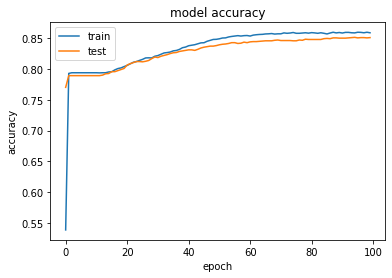

In [ ]:
#@title
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'], loc='upper_left')
plt.show()


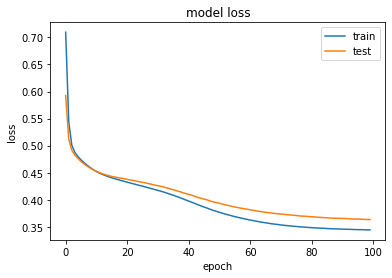

In [ ]:
#@title
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
#@title
#Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5


In [ ]:
#@title
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
#@title
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [ ]:
#@title
print(cm)

[[2342   74]
 [ 334  250]]


In [ ]:
#@title
print(score)

0.864
